# MILESTONE 1

## Perkenalan
Nama    : Ravin Mizia Rayeok

Batch   : FTDS-17-RMT

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None


# supaya rapih ignore warnings 
import warnings
warnings.filterwarnings("ignore")


c:\Users\ravin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Loading

SELECT 

    limit_balance,

    CAST(sex AS INT64) as sex,

    CAST(education_level AS INT64) as education_level,

    CAST(marital_status AS INT64) as marital_status,

    age, 

    pay_0, 

    pay_2, pay_3, pay_4, CAST(pay_5 AS FLOAT64) as pay_5, CAST(pay_6 AS FLOAT64) as pay_6, 

    bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6,

    pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, 

    CAST(default_payment_next_month AS INT64) as default_payment_next_month,

FROM bigquery-public-data.ml_datasets.credit_card_default

LIMIT 33932;

Data yang digunakan adalah data dari bigquery degan fitur terpilih  dan telah dirubah data typenya sesuai kebutuhan untuk membangun model

In [2]:
data = pd.read_csv('h8dsft_P1M1_Ravin_Mizia_Rayeok.csv')

data.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
5,500000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,155820.0,171565.0,184782.0,152365.0,139757.0,153348.0,20000.0,20241.0,20154.0,20019.0,20151.0,20037.0,0
6,50000.0,1,2,1,40.0,0.0,0.0,0.0,0.0,0.0,0.0,49073.0,49531.0,44002.0,44356.0,19344.0,19354.0,1691.0,1942.0,1296.0,674.0,693.0,1000.0,0
7,100000.0,1,5,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,94502.0,95697.0,98222.0,90500.0,82586.0,22620.0,5000.0,5000.0,3203.0,2103.0,50000.0,0.0,0
8,140000.0,1,2,1,29.0,0.0,0.0,0.0,0.0,0.0,0.0,130767.0,134946.0,130470.0,132038.0,131961.0,124256.0,6696.0,5000.0,4866.0,5300.0,5055.0,5000.0,0
9,50000.0,1,2,1,43.0,0.0,0.0,0.0,0.0,0.0,0.0,48919.0,48775.0,48731.0,48934.0,29116.0,28999.0,1800.0,2200.0,1400.0,582.0,580.0,30000.0,0


In [3]:
data.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000.0,2,2,1,28.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,16666.0,1000.0,16666.0,0.0,0.0,0.0,1000.0,16666.0,0.0,0.0,0.0,0.0,0
2956,200000.0,2,1,1,49.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,413.0,0.0,103.0,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,225.0,0
2957,50000.0,2,1,2,31.0,-1.0,0.0,-1.0,-1.0,-1.0,-2.0,12725.0,34526.0,12787.0,3995.0,0.0,0.0,30018.0,12787.0,3995.0,0.0,0.0,0.0,0
2958,50000.0,2,1,2,25.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,13572.0,17983.0,15590.0,10610.0,0.0,0.0,5000.0,200.0,10610.0,0.0,0.0,0.0,0
2959,100000.0,2,1,2,37.0,-1.0,-1.0,0.0,-1.0,-1.0,-2.0,1725.0,21711.0,10487.0,780.0,0.0,0.0,21711.0,1000.0,780.0,0.0,0.0,0.0,0
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,178.0,1860.0,940.0,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,2650.0,0.0,855.0,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,886.0,0.0,930.0,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2964,100000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,430.0,35993.0,2772.0,0.0,0.0,0.0,35993.0,2772.0,0.0,0.0,0.0,0.0,0


## EDA

### 1. Data Information and Description

In [4]:
# see data shape
data.shape

(2965, 24)

In [5]:
# see data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [6]:
# see data descriptions
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Data sex rangenya hanya 1.0 dan 2.0

Data default_payment_next_month rangenya hanya 0 dan 1



### 2. Probability Clients yang akan default

(-1.0999999771299611,
 1.0999999989109506,
 -1.0999999453263387,
 1.0999999935022653)

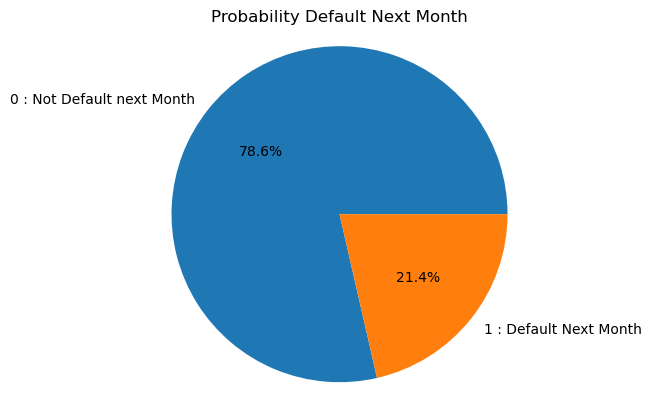

In [7]:
plt.pie(data.default_payment_next_month.value_counts(), labels=['0 : Not Default next Month','1 : Default Next Month'], autopct='%1.1f%%')
plt.title('Probability Default Next Month')
plt.axis('equal')

Dalam dataset, chance untuk default adalah 21,4% untuk bulan depan

### 3. Melihat nilai unique dari masing masing fitur

In [8]:
# jumlah unqiue masing2 kolom
for col in data.columns:
    if data[col].nunique() < 20:
        print(col, data[col].nunique())

sex 2
education_level 7
marital_status 4
pay_0 11
pay_2 10
pay_3 9
pay_4 10
pay_5 9
pay_6 8
default_payment_next_month 2


In [9]:
# cek every unique value dengan jumlah unqie value dibawah 20
for col in data.columns:
    if data[col].nunique() < 20:
  
        print(col,'value unique =', data[col].unique())
        print('')


sex value unique = [1 2]

education_level value unique = [1 2 5 3 6 4 0]

marital_status value unique = [1 2 3 0]

pay_0 value unique = [ 0.  2. -2.  3.  4.  5.  6.  7.  8.  1. -1.]

pay_2 value unique = [ 0. -1.  2.  3.  4. -2.  5.  6.  7.  1.]

pay_3 value unique = [ 0.  2. -1.  3. -2.  4.  6.  7.  5.]

pay_4 value unique = [ 0.  2. -2.  3. -1.  5.  4.  6.  7.  8.]

pay_5 value unique = [ 0. -1.  2.  3.  4. -2.  5.  6.  7.]

pay_6 value unique = [ 0.  2.  3. -1. -2.  6.  7.  4.]

default_payment_next_month value unique = [0 1]



Kolom `education_level` dan ``marital_status`` memiliki indikasi masuk kedalam golongan ``kolom kategorikal`` walaupun data type nya numerikal.

Kolom `marital_status` adalah `Kategorikal Nominal`

Kolom `education_level` adalah `Kategorikal Ordinal`

### 4. Status marriage dan jenis kelamin (sex)

In [10]:
data.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1


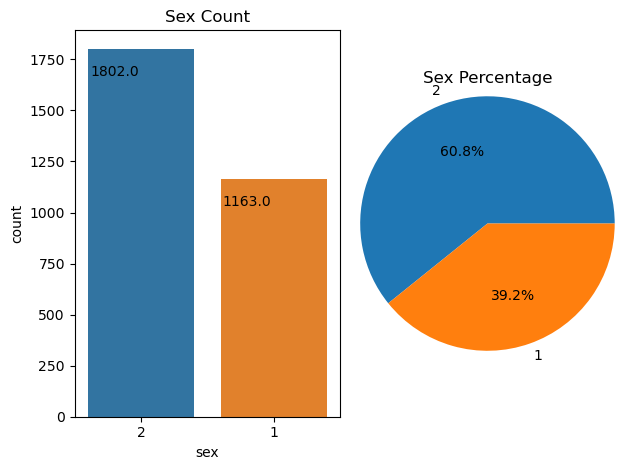

In [11]:
# plotting sex percentage and count

inter=data['sex'].value_counts()

plt.subplot(1,2,1)
plt.title('Sex Count')
ax = sns.countplot(x='sex',data=data, order=inter.index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)



plt.subplot(1,2,2)
plt.pie(inter,labels=inter.index,autopct='%0.1f%%',radius=1.2)
plt.title('Sex Percentage')

plt.tight_layout()

Dari plot diatas dapat dilihat bahwa persentase sex untuk tipe sex 1 (39,2%) adalah 1163 dan tipe sex 2 adalah 1802 (60,8%). Kedua sex type yang diasumsikan laki laki dan perempuan ini dati dataset cenderung tidak setara

In [12]:
data.loc[:,['pay_3','default_payment_next_month']].groupby(by='default_payment_next_month').max()

,pay_3
default_payment_next_month,
0,6.0
1,7.0


In [13]:
inter=data['sex'].value_counts()
inter

2    1802
1    1163
Name: sex, dtype: int64

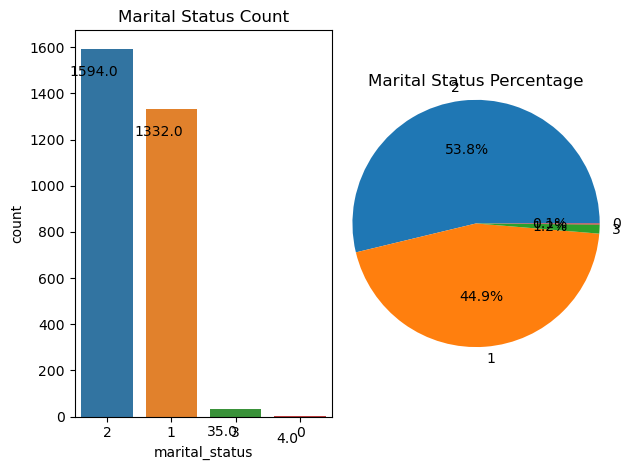

In [14]:
# plotting marriage percentage and count
inter=data['marital_status'].value_counts()
    
plt.subplot(1,2,1)
plt.title('Marital Status Count')
ax = sns.countplot(x='marital_status',data=data,order=inter.index, )
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)


plt.subplot(1,2,2)
plt.pie(inter,labels=inter.index,autopct='%0.1f%%',radius=1.2)
plt.title('Marital Status Percentage')

plt.tight_layout()

Dari visualisasi kali ini kita dapat lihat ada 4 unique value dari kolom marital status, yaitu marital status 0 sampai 3 yang didominasi oleh marital status 2 dan 1 yang masing masing sebanyak 53,8% dan 44,9%

## Split Data

In [15]:
# X dan y
X = data.drop('default_payment_next_month', axis=1)
y = data['default_payment_next_month']

In [16]:
# split data based on test train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)

In [17]:
# create categorical and numerical columns

num_columns = X_train.select_dtypes(include='number').columns.tolist()
cat_columns = X_train.select_dtypes(include='string').columns.tolist()


print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Cat Columns :  []


Tidak ada data categorical

In [18]:
# create categorical and numerical data

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
96,50000.0,1,3,1,44.0,0.0,0.0,0.0,0.0,0.0,0.0,15109.0,16117.0,17217.0,18005.0,18369.0,18888.0,1263.0,1363.0,1151.0,515.0,670.0,780.0
1610,80000.0,2,2,2,24.0,2.0,0.0,0.0,0.0,0.0,0.0,79243.0,75254.0,58683.0,58886.0,60035.0,57264.0,3249.0,3000.0,5000.0,2500.0,2300.0,2200.0
1393,330000.0,1,2,2,37.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,16270.0,140.0,500.0,1226.0,-1121.0,1879.0,140.0,1500.0,1226.0,0.0,3000.0,3000.0


## Feature Engineering

### Null Values detection

In [19]:
#mengecek nilai null values

print('Null values pada X_train =',X_train.isnull().sum().tolist())
print('Null values pada X_test =',X_test.isnull().sum().tolist())
print('')
print('Null values pada y_train =',y_train.isnull().sum().tolist())

Null values pada X_train = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Null values pada X_test = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Null values pada y_train = 0


Tidak ada Null Value pada dataset

### Outlier Detection

In [20]:
# pembagian dataset ke kompartemen bidang
print(num_columns)

['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


In [21]:
# segmentasi data num
X_train_prs = X_train_num.loc[:,['limit_balance', 'sex', 'education_level', 'marital_status', 'age']] 

X_train_pay  = X_train_num.loc[:,['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']] 

X_train_bill_amt = X_train_num.loc[:,['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']]

X_train_pay_amt =  X_train_num.loc[:,['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]

#### Kolom Status

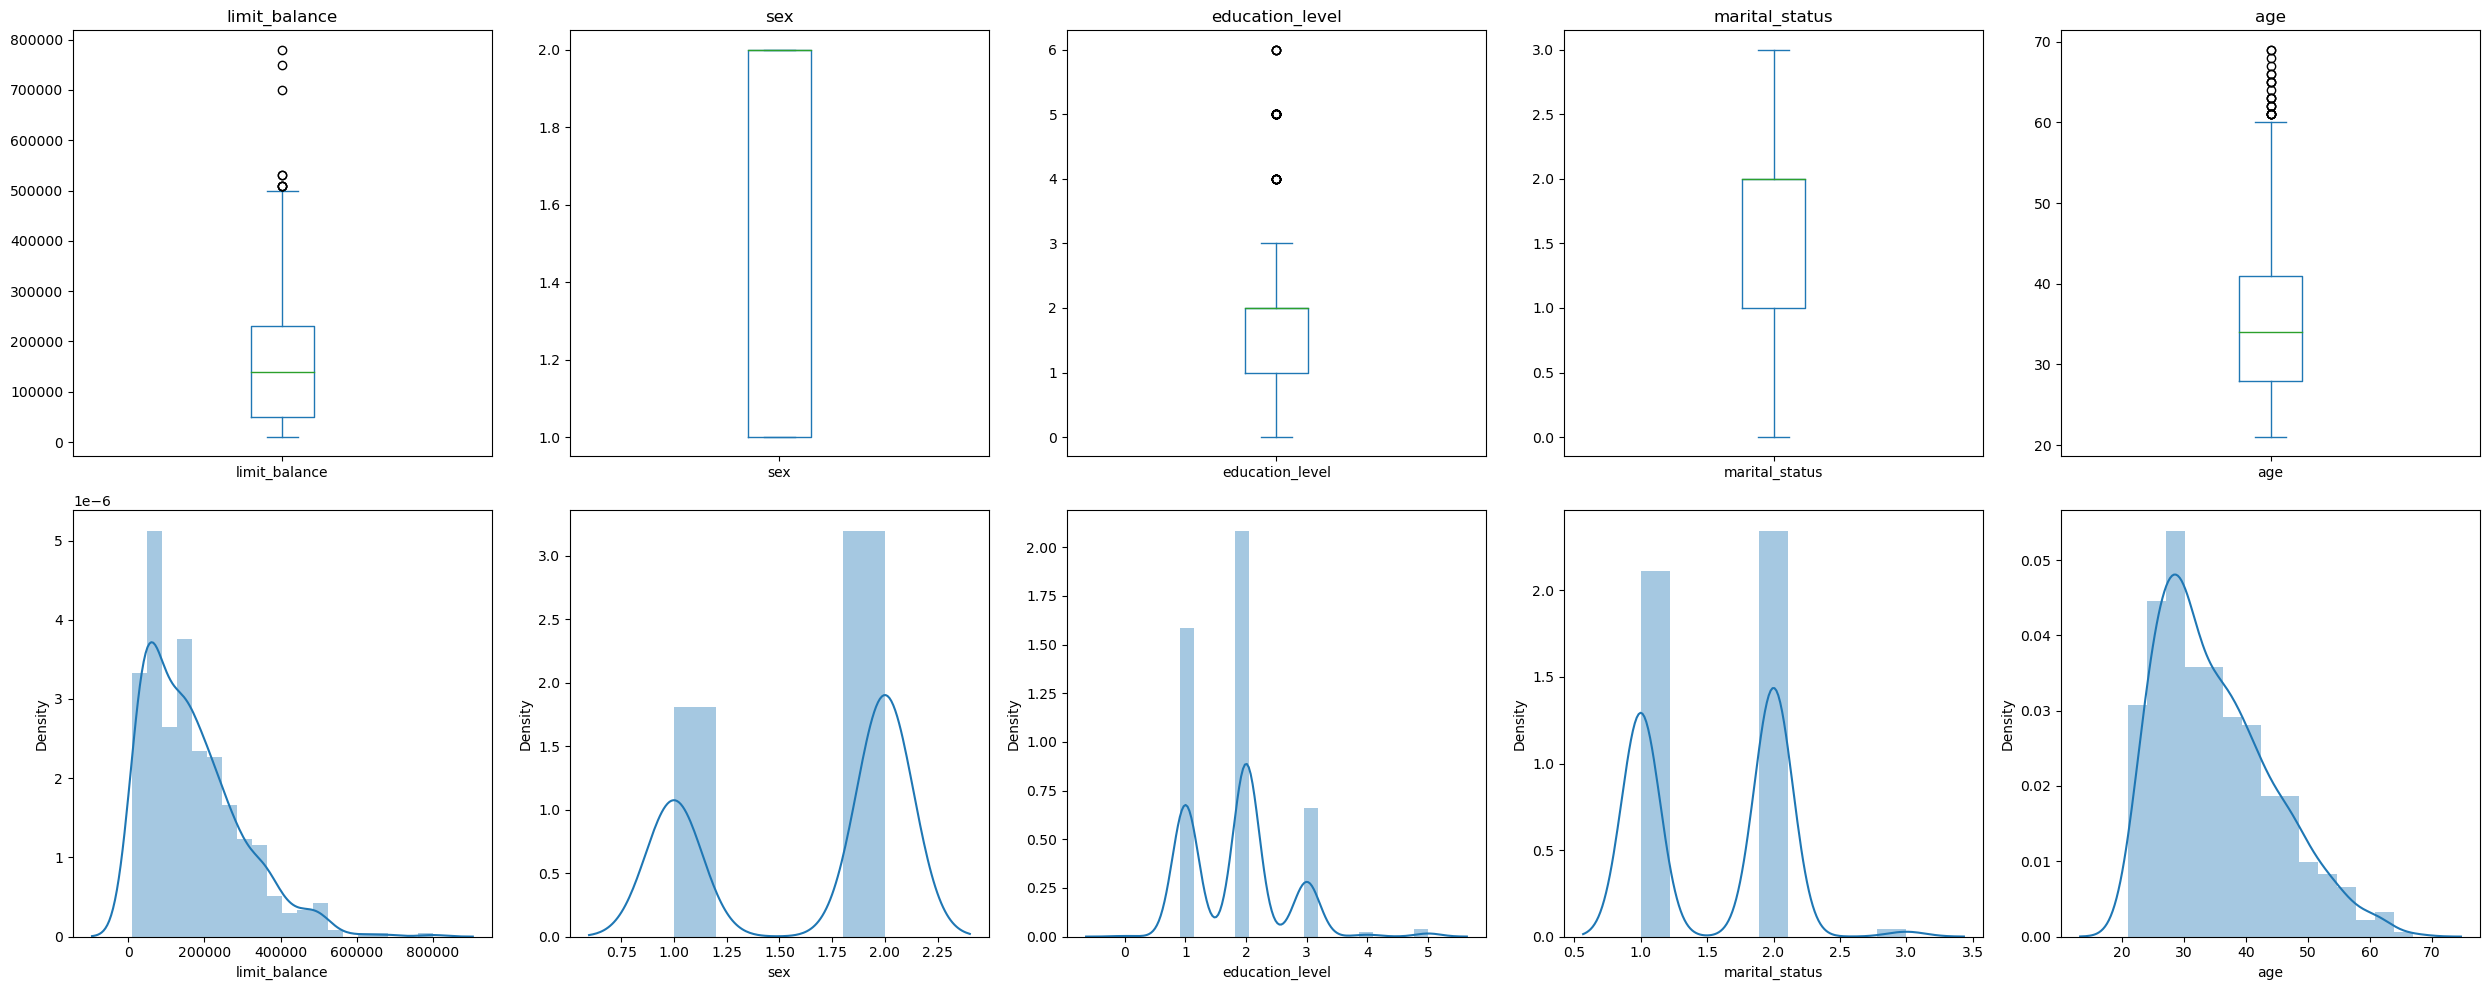

In [22]:
# Membuat figur boxplot dan distribution plot untuk visualisasi

fig, axes = plt.subplots(nrows=2, ncols=len(X_train_prs.columns), figsize=(25,10))

for i, column in enumerate(X_train_prs.columns):
    
    X_train_prs[column].plot(ax=axes[0][i], kind='box')
    sns.distplot(X_test_num[column],ax=axes[1][i])
    axes[0][i].set_title(column)


plt.tight_layout()
plt.show()

In [23]:
for i in X_train_prs.columns:
    print(i, 'skewness   = ',X_train_prs[i].skew())

limit_balance skewness   =  0.9664998622750386
sex skewness   =  -0.40814789288710296
education_level skewness   =  0.9188081530329916
marital_status skewness   =  -0.0383020649587229
age skewness   =  0.771105780891202


Pada seluruh fitur pada grup kolom Status, tidak ada outlier yang dianggap terlalu menganggu atau ekstrim, semua masih dalam skala normal. Jadi tidak diadakan handlinng outlier 

#### Kolom Bill Amount

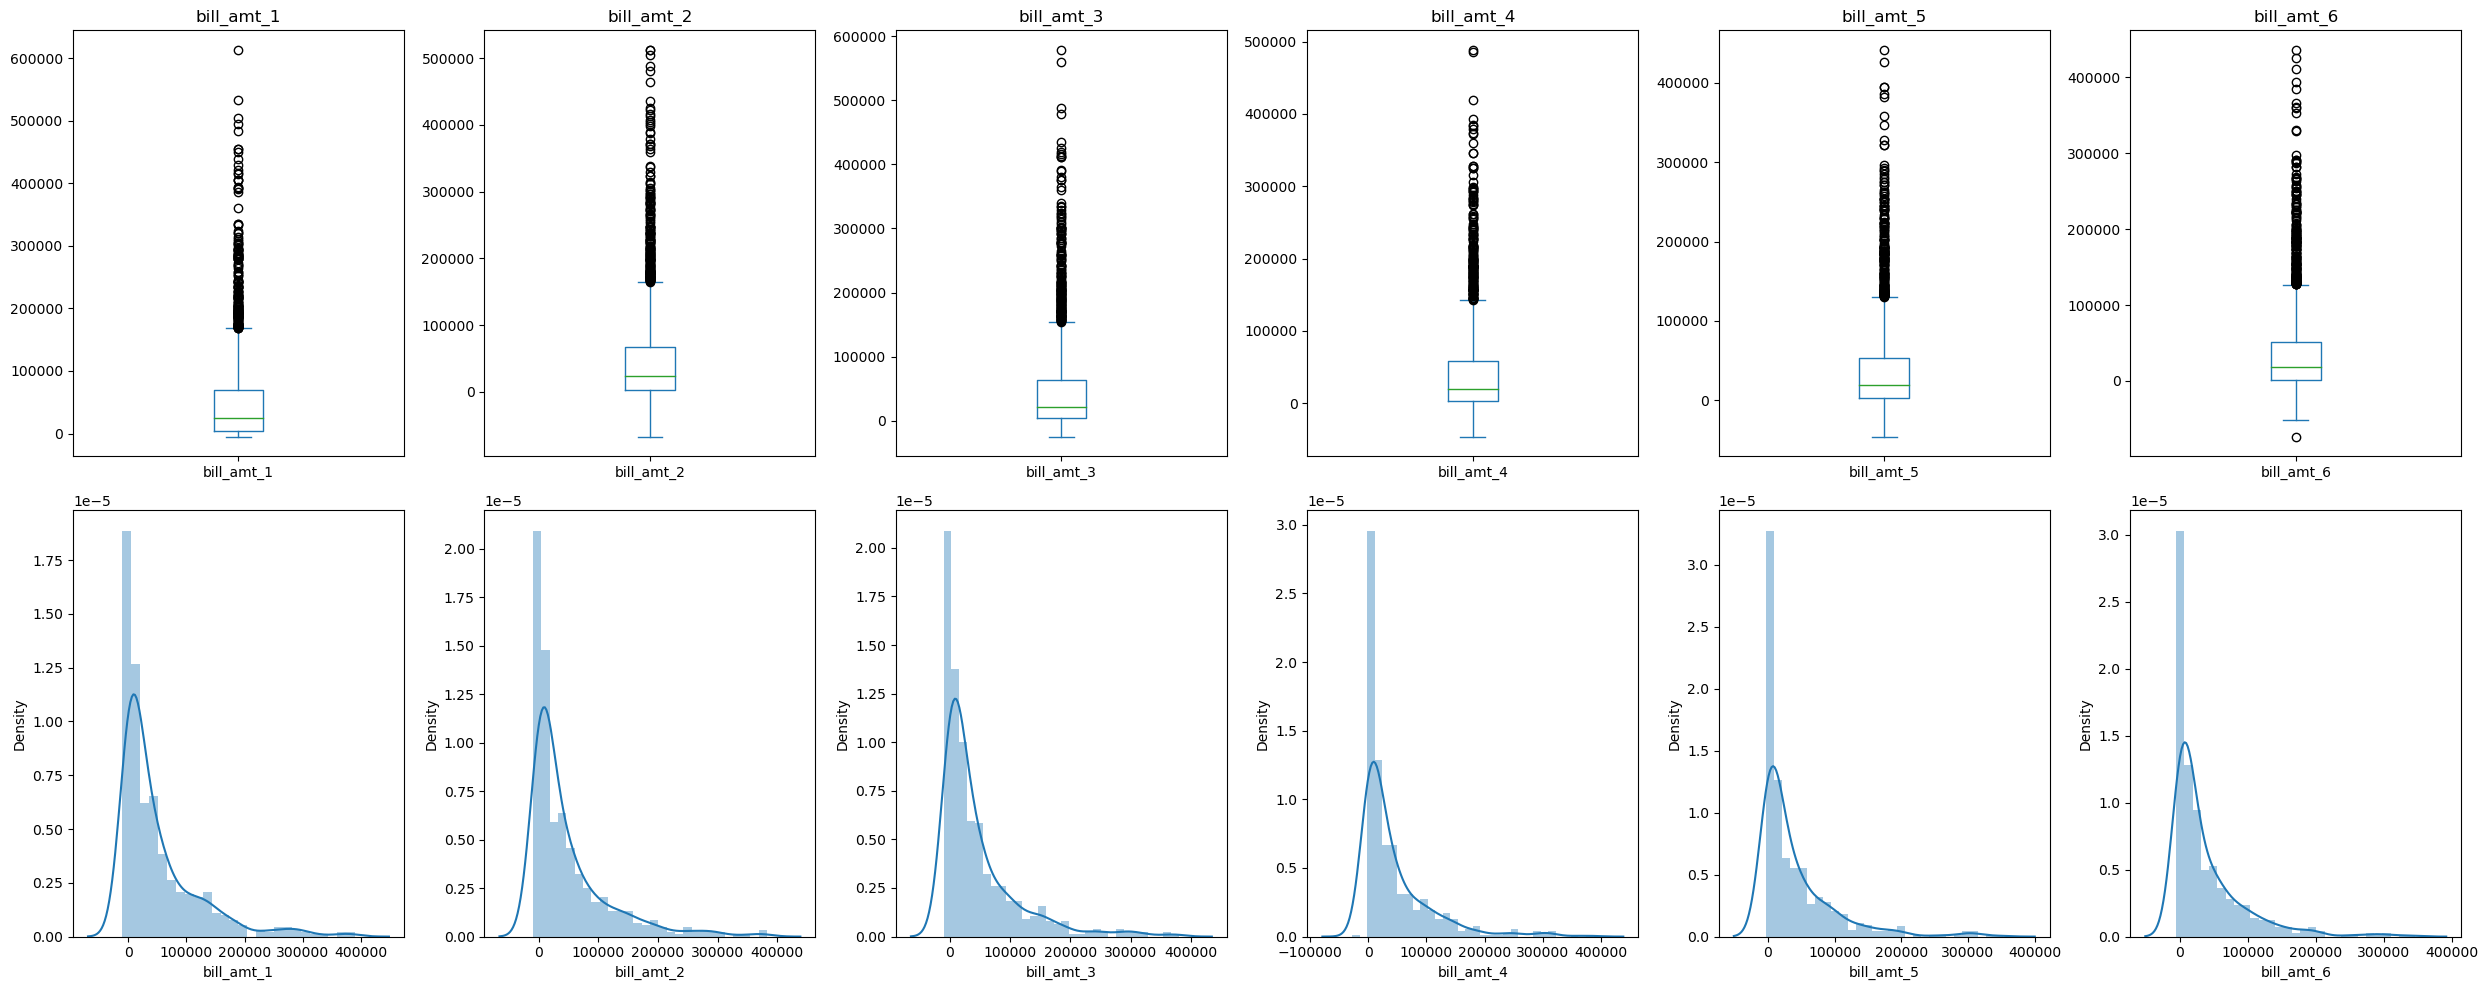

In [24]:
# Membuat figur boxplot dan distribution plot untuk visualisasi

fig, axes = plt.subplots(nrows=2, ncols=len(X_train_bill_amt.columns), figsize=(25,10))

for i, column in enumerate(X_train_bill_amt.columns):
    
    X_train_bill_amt[column].plot(ax=axes[0][i], kind='box')
    sns.distplot(X_test_num[column],ax=axes[1][i])
    axes[0][i].set_title(column)


plt.tight_layout()
plt.show()

In [25]:
for i in X_train_bill_amt.columns:
    print(i, ' skewness    = ',X_train_bill_amt[i].skew())

bill_amt_1  skewness    =  2.554602101273616
bill_amt_2  skewness    =  2.5058944049386263
bill_amt_3  skewness    =  2.6160378919355227
bill_amt_4  skewness    =  2.4677554104843122
bill_amt_5  skewness    =  2.389837681935942
bill_amt_6  skewness    =  2.4353856411133172


Lagi, pada grup fitur ini tidak ada outlier atau value yang ekstrim, oleh karena itu lebih baik tidak dilakukan handling karena ada resiko kegilangan data yang penting

#### Kolom Pay Amount

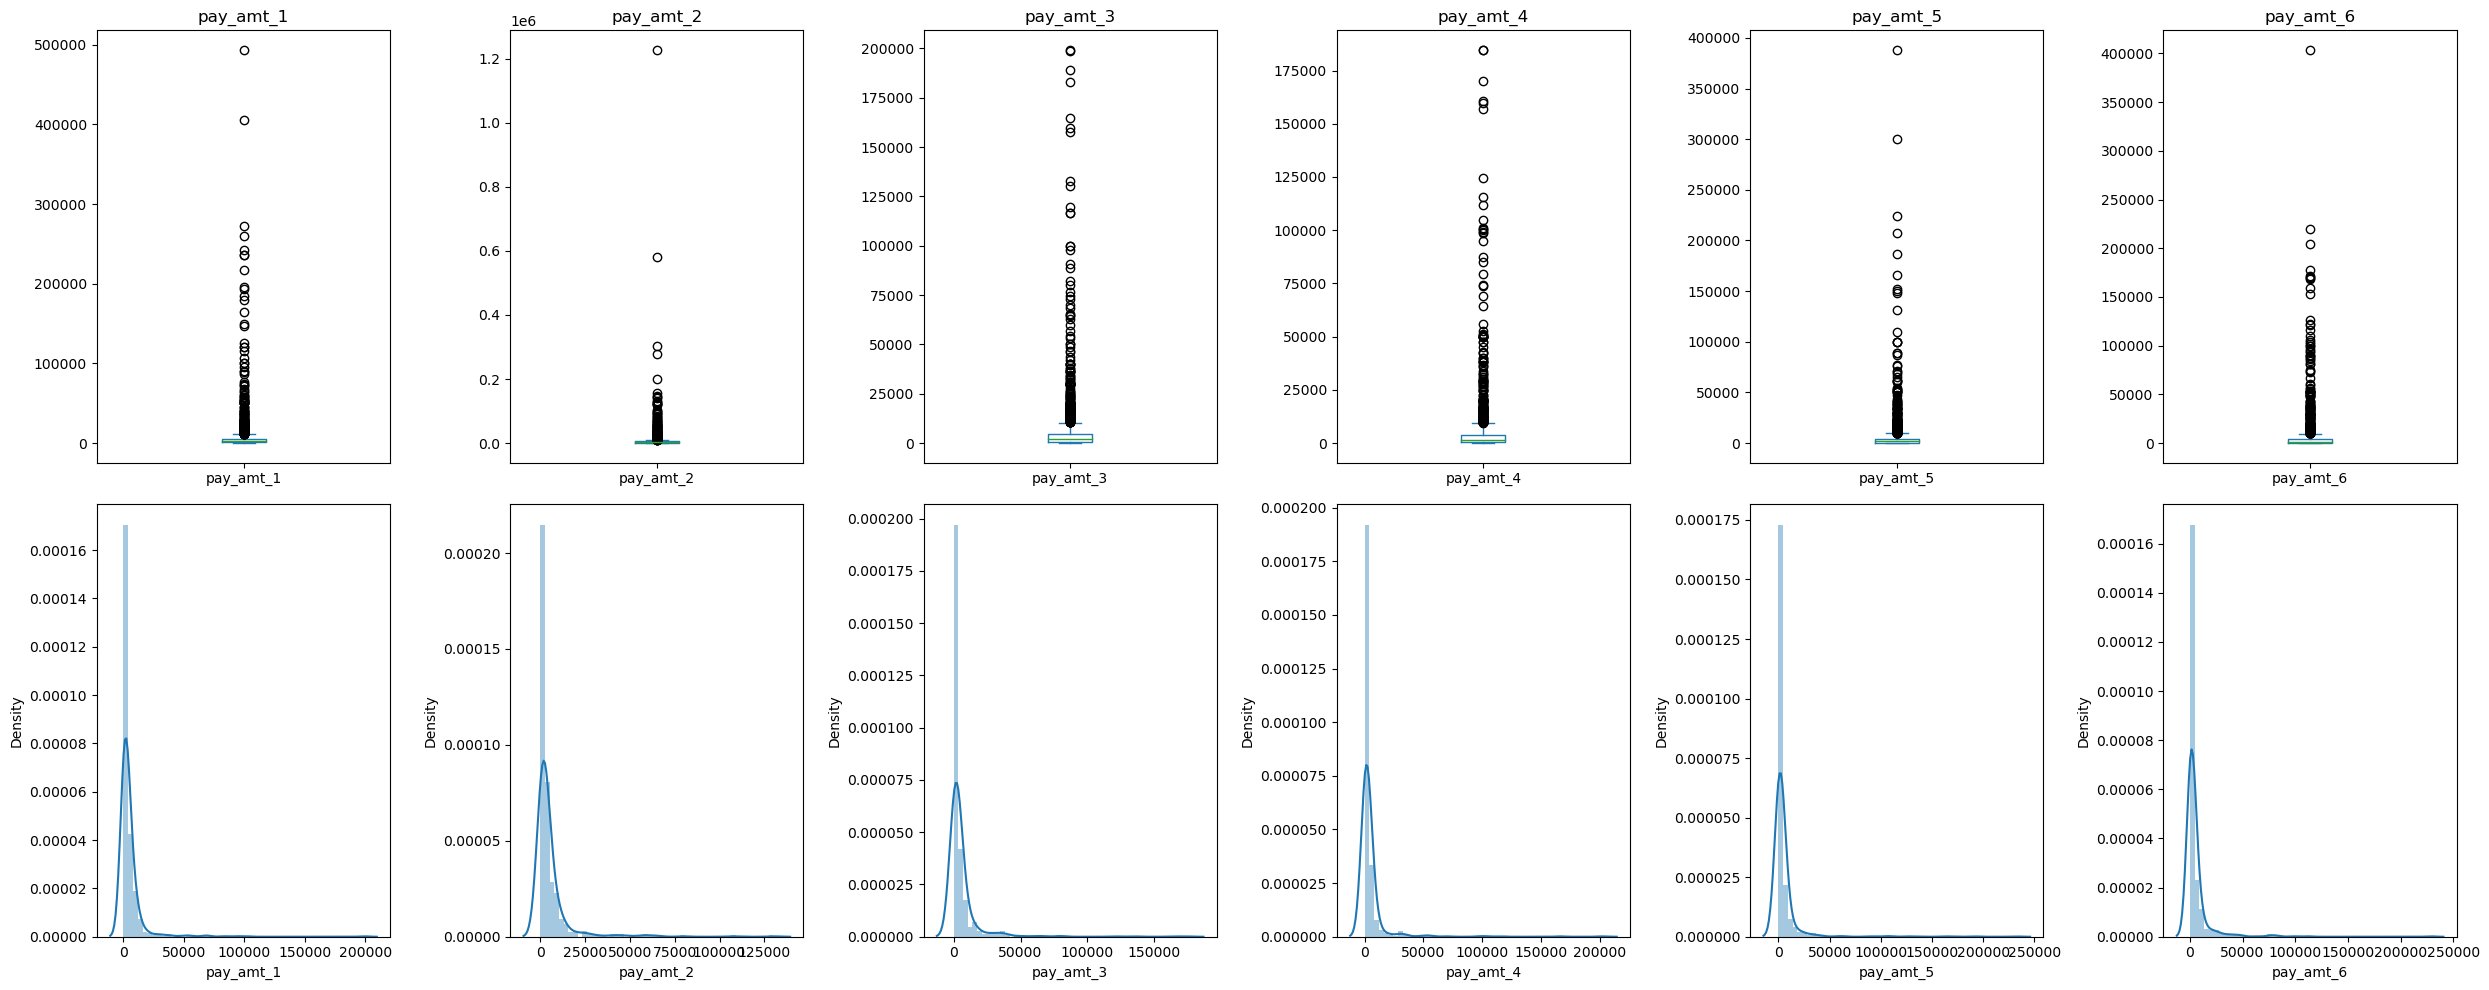

In [26]:
# Membuat figur boxplot dan distribution plot untuk visualisasi

fig, axes = plt.subplots(nrows=2, ncols=len(X_train_pay_amt.columns), figsize=(25,10))

for i, column in enumerate(X_train_pay_amt.columns):
    
    X_train_pay_amt[column].plot(ax=axes[0][i], kind='box')
    sns.distplot(X_test_num[column],ax=axes[1][i])
    axes[0][i].set_title(column)


plt.tight_layout()
plt.show()

In [27]:
# cek skewness
for i in X_train_pay_amt.columns:
    print(i, ' skewness    = ',X_train_pay_amt[i].skew())

pay_amt_1  skewness    =  11.558804944974614
pay_amt_2  skewness    =  27.47438071142828
pay_amt_3  skewness    =  8.351959614213474
pay_amt_4  skewness    =  8.354549604830506
pay_amt_5  skewness    =  12.297676624665511
pay_amt_6  skewness    =  9.90373072804823


In [28]:
# nilai max
X_train[X_train.pay_amt_2 == X_train.pay_amt_2.max()]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2541,510000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,71121.0,481382.0,559712.0,163628.0,117475.0,116656.0,493358.0,1227082.0,164577.0,510.0,6239.0,4550.0


Pada kolom pay amout memang terlihat banyak nilai esktrem yang ada di boxplot.Namun perli dilihat lagi, nilai extreme tidak hanya ada disatu plot pay_amt, tapi disemuanya, oleh karena itu berarti masih masuk kedalam nilai yang dianggap lumrah 

### Scalling all columns numerical

Tahanpan ini adalah tahapan untuk scalling kolom numerical karena akan digunakan untuk korelasi pearson dan pembuatan model

In [29]:
# drop kolom numerical yang masuk ekdalam kolom kategorical
X_train_num = X_train.drop(['marital_status','education_level','sex'], axis=1)
X_test_num = X_test.drop(['marital_status','education_level','sex'], axis=1)

In [30]:
# loop sckewness
for col in X_test_num:
    print(col, 'Skewness : ', X_test_num[col].skew() )

limit_balance Skewness :  1.1391803721775209
age Skewness :  0.7819636339408002
pay_0 Skewness :  1.3949134646980563
pay_2 Skewness :  1.0356027840713953
pay_3 Skewness :  1.2475796804891268
pay_4 Skewness :  1.3663463178962236
pay_5 Skewness :  1.3360356537956088
pay_6 Skewness :  1.3370035889225813
bill_amt_1 Skewness :  2.1425896979132006
bill_amt_2 Skewness :  2.211567067503606
bill_amt_3 Skewness :  2.330037259630293
bill_amt_4 Skewness :  2.371538384930507
bill_amt_5 Skewness :  2.4489951111933093
bill_amt_6 Skewness :  2.4027919962825406
pay_amt_1 Skewness :  8.416671840049467
pay_amt_2 Skewness :  5.888751316066108
pay_amt_3 Skewness :  7.0327274810919125
pay_amt_4 Skewness :  8.588843287550135
pay_amt_5 Skewness :  8.627745124965436
pay_amt_6 Skewness :  8.26780358008472


``Karena semua kolom rata rata skew, maka akan digunakan minmax scaler``

In [31]:
# minmax scaler lib
from sklearn.preprocessing import MinMaxScaler


In [32]:
# menggunakan min max scaler
scaler = MinMaxScaler()

scaler.fit(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)
X_train_scaled

array([[0.05194805, 0.47916667, 0.2       , ..., 0.00278926, 0.00172649,
        0.00193309],
       [0.09090909, 0.0625    , 0.4       , ..., 0.01354008, 0.00592675,
        0.00545229],
       [0.41558442, 0.33333333, 0.2       , ..., 0.        , 0.00773054,
        0.00743494],
       ...,
       [0.37662338, 0.3125    , 0.2       , ..., 0.01089164, 0.00220578,
        0.0025031 ],
       [0.01298701, 0.58333333, 0.2       , ..., 0.00321712, 0.00158992,
        0.0035316 ],
       [0.09090909, 0.16666667, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
#kolom scaled
scaled_column = X_train_num.columns

In [34]:
# pembuatan dataframe scaled x num
X_train_scaled = pd.DataFrame(X_train_scaled, columns=scaled_column, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=scaled_column, index=X_test.index)
X_train_scaled.head(2)

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
96,0.051948,0.479167,0.2,0.222222,0.222222,0.2,0.222222,0.222222,0.033562,0.144168,0.070581,0.120709,0.133023,0.181904,0.002560,0.001111,0.005778,0.002789,0.001726,0.001933
1610,0.090909,0.062500,0.4,0.222222,0.222222,0.2,0.222222,0.222222,0.137080,0.246098,0.139186,0.197060,0.218298,0.257141,0.006585,0.002445,0.025099,0.013540,0.005927,0.005452


In [35]:
# create y dataframe of train set
y_train_df = pd.DataFrame(y_train)

In [36]:
X_train_num.head(2)

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
96,50000.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,15109.0,16117.0,17217.0,18005.0,18369.0,18888.0,1263.0,1363.0,1151.0,515.0,670.0,780.0
1610,80000.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,79243.0,75254.0,58683.0,58886.0,60035.0,57264.0,3249.0,3000.0,5000.0,2500.0,2300.0,2200.0


<AxesSubplot: >

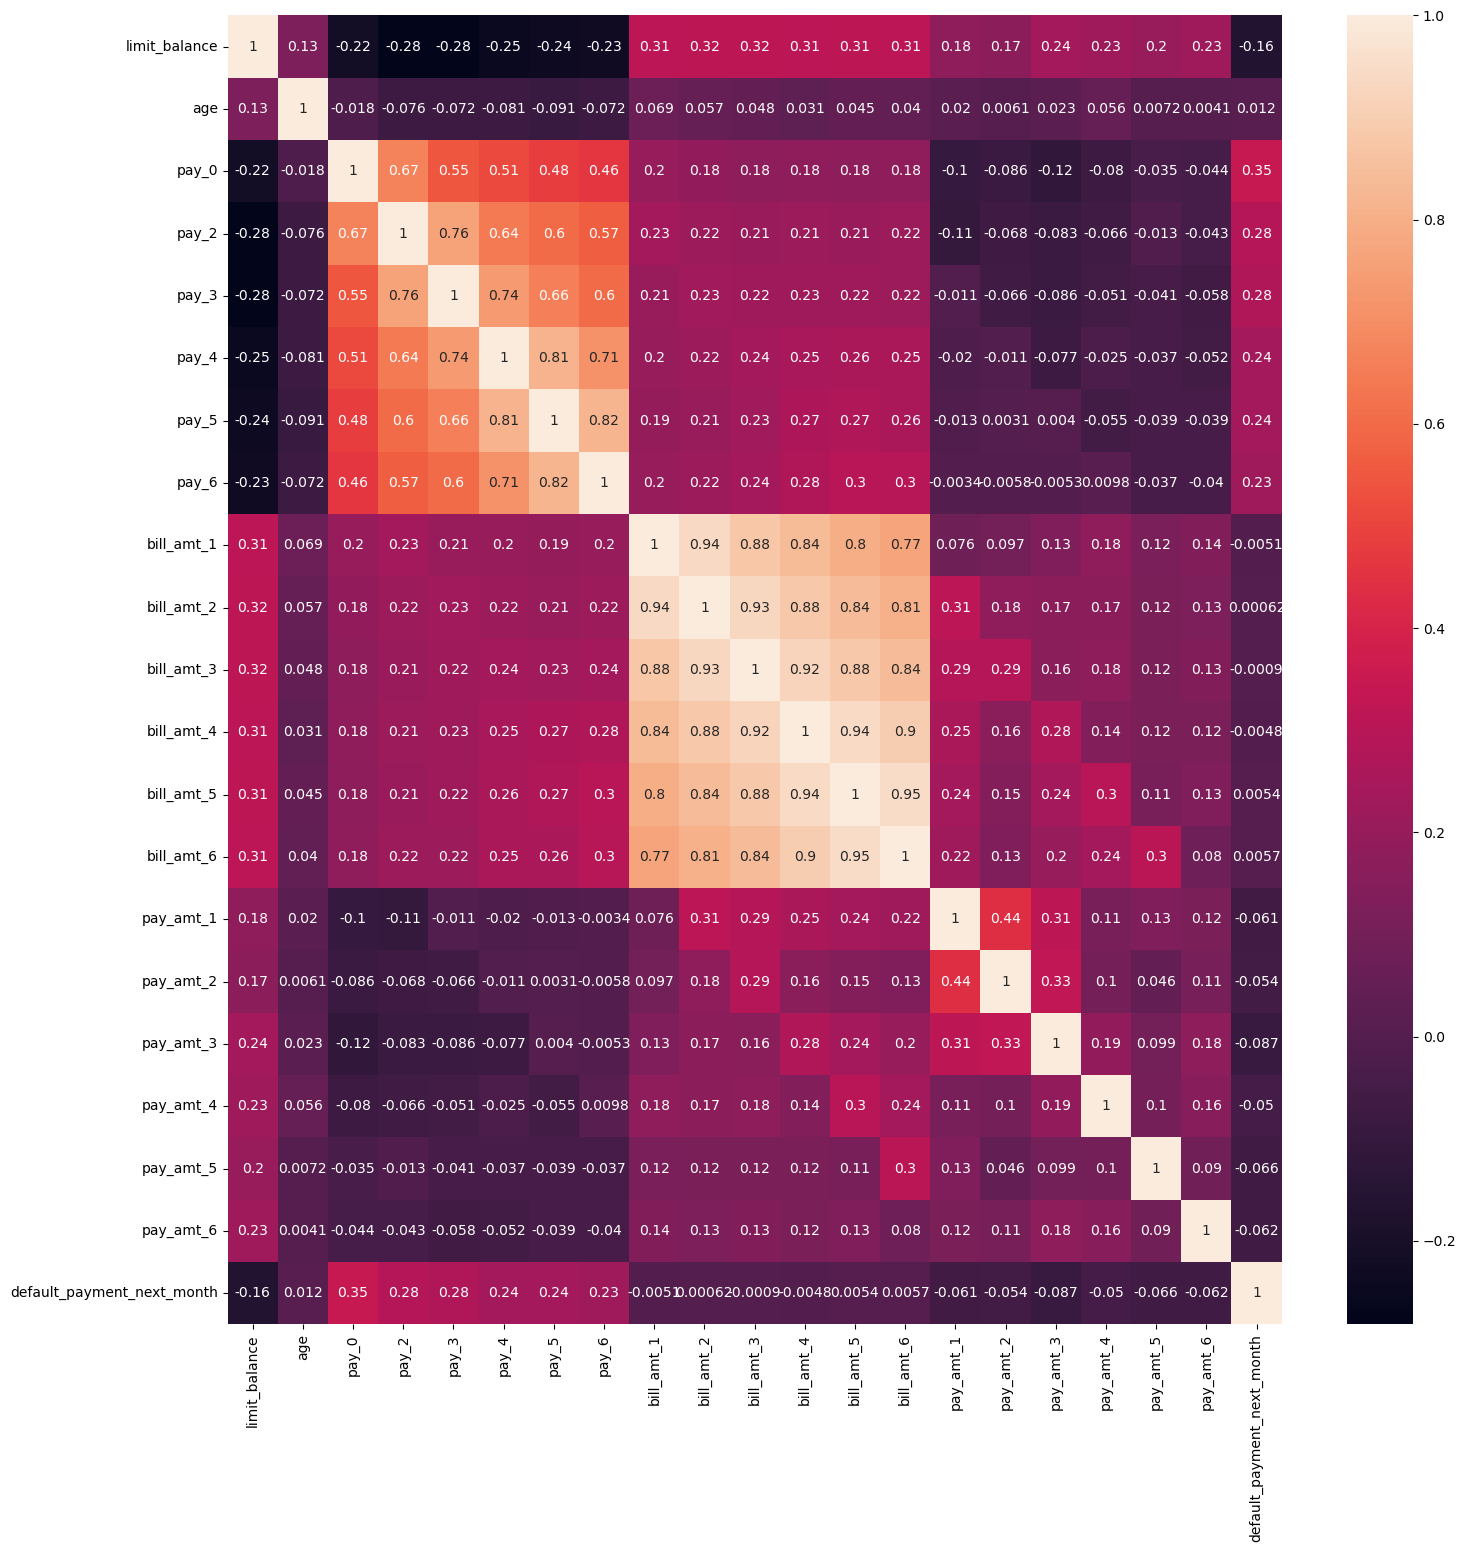

In [37]:
#ploting pearson correlation
df_corr_num = pd.concat([X_train_scaled,y_train_df], axis=1)
fig = plt.figure(figsize=(17,17))
sns.heatmap(df_corr_num.corr(), annot=True)


seperti yang dapat kita lihat bahwa prediksi default bulan depan bergantung pada status pembayaran (pay_) enam bulan terakhir dari semua fitur yang diberikan dan limit_balance nya

In [38]:
# fitur yang dipilih untuk pemodelan
X_train_scaled_new =  X_train_scaled.loc[:,['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','limit_balance']]
X_test_scaled_new =  X_test_scaled.loc[:,['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','limit_balance']]

X_train_scaled_new.head(2)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
96,0.2,0.222222,0.222222,0.2,0.222222,0.222222,0.051948
1610,0.4,0.222222,0.222222,0.2,0.222222,0.222222,0.090909


`Data yang akan dimasukkan kedalam pemodelan adalah data numerik yang sudah di scalling, karena beberapa model seperti Logistic Regression dan SVM mengandalkan jarak (euclidean) antar poin. Jika tidak di scaling dan lalu dibuat model. Model akan memiliki resiko bias karena nanti model akan didominasi oleh data/fitur yang memilki range value yang lebih besar dari yang lain `

In [39]:
# Renew Scalling Variabel demi keperluan inferencing 
scaler_1 = MinMaxScaler()

scaler_1.fit(X_train_num.loc[:,['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','limit_balance']])


MinMaxScaler()

### Encode kolom marital_status dan sex

Tahap ini adalah tahap dimana data numerical yang terlihat kategorical untuk membuat korelasinya dengan parson

In [40]:
# membuat kolom encoded
enoded_data = X_train.loc[:,['sex','marital_status']]
enoded_data.head(2)

,sex,marital_status
96,1,1
1610,2,2


Digunakan one hot encoding karena data numerik yang ingin di encode memiliki nilai yang tidak memiliki ranking

In [41]:
# code menggunakan one hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

marital_train_ohe = ohe.fit(X_train.loc[:,['marital_status']])

marital_train_ohe = ohe.transform(X_train.loc[:,['marital_status']])

marital_test_ohe = ohe.transform(X_test.loc[:,['marital_status']])

marital_columns_ohe = ohe.get_feature_names(['marital_status'])

marital_train_ohe

<2372x4 sparse matrix of type '<class 'numpy.float64'>'
	with 2372 stored elements in Compressed Sparse Row format>

In [42]:
# pmbuatan dataframe marital status yang sudah di encoded
marital_train_ohe = pd.DataFrame(marital_train_ohe.toarray(), columns=marital_columns_ohe,index=X_train['marital_status'].index)
marital_test_ohe = pd.DataFrame(marital_test_ohe.toarray(), columns=marital_columns_ohe,index=X_test['marital_status'].index)


marital_train_ohe.head(3)

,marital_status_0,marital_status_1,marital_status_2,marital_status_3
96,0.0,1.0,0.0,0.0
1610,0.0,0.0,1.0,0.0
1393,0.0,0.0,1.0,0.0


In [43]:
marital_train_ohe.shape


(2372, 4)

<AxesSubplot: >

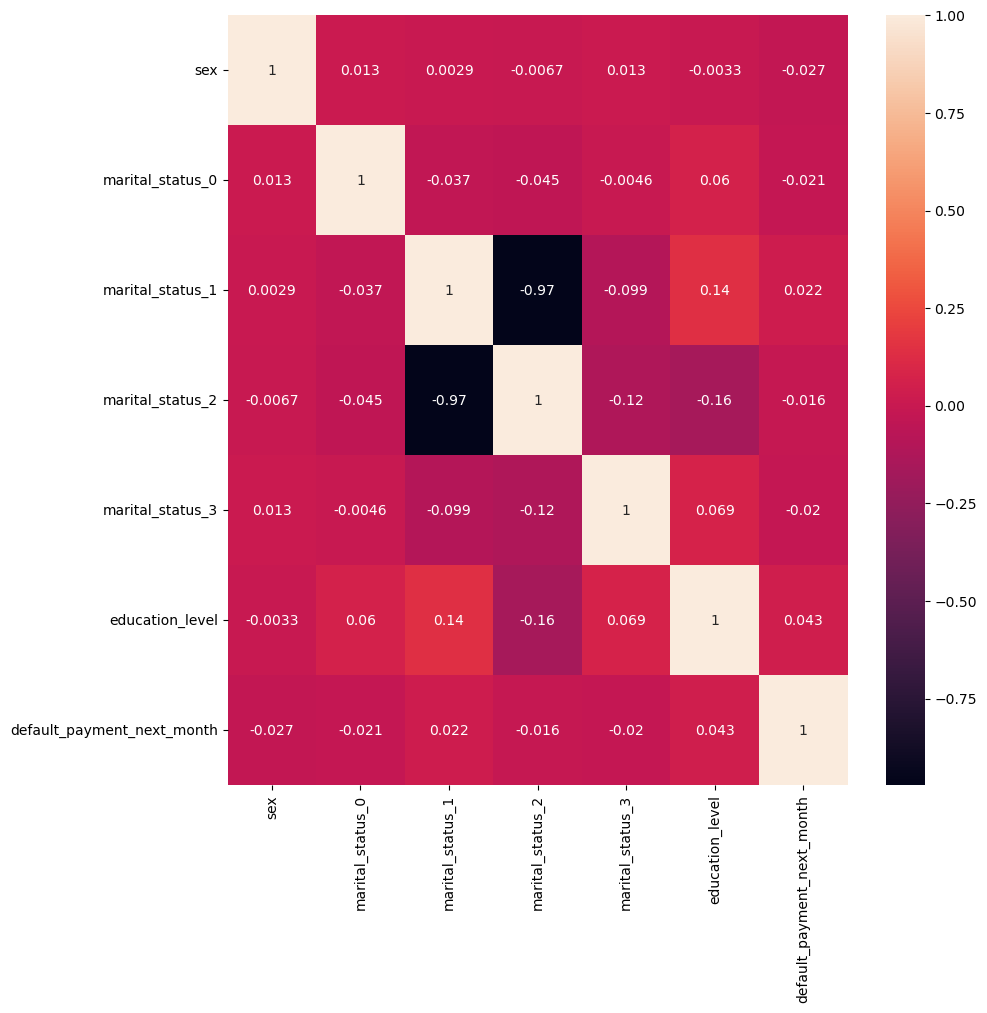

In [44]:
# correlation plot
df_corr_cat = pd.concat([X_train.loc[:,['sex']] , marital_train_ohe,X_train.loc[:,['education_level']], y_train_df], axis=1)
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_corr_cat.corr(), annot=True)

Terlihat dari hasil plot korelasi oleh pearson, fitur sex, marital status, education level tidak memiliki korelasi yang signmifikan terhadap kolom target default payment next month. Oleh karena itu tidak ada yng dipilih

## Model Definition

In [45]:
# model importing dari semua model

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
# model definition
lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf  = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

models_list = [lr,svc,dt,rf,knn,gnb]

Semua parameter pada baseline model dibuat dengan default dan tidak dirubah, lalu dilakukan cross val untuk evaluasi dan pemilihan model terbaik, lalu model terbaik akan tuning, untuk dicarikan lagi parameter terbaiknya dan dilihat apakah ada perbedaan.

## Model Training

In [47]:
# data imbalance
data.default_payment_next_month.value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

In [48]:
# mmenggunakan loop

# masukkan model ke dictionry
models = {'Logistic Regression': LogisticRegression(),
          'SVM': SVC(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'KNN' : KNeighborsClassifier(),
          'Naive Bayes' : GaussianNB()    
          }


# Fit dan  predict dengan each model
for model_name, model in models.items():

    model.fit(X_train_scaled_new, y_train)    

``Model Defintiion dengan parameter lainnya dengan nilai default``

## Model Evaluation

### Classification Report

In [49]:
from sklearn.metrics import classification_report

# membuat loop classification report
for model_name, model in models.items():
    
    y_pred = model.predict(X_test_scaled_new)
    
    print(model)
    print(classification_report(y_test, y_pred), end='') 
    print('')

LogisticRegression()
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       456
           1       0.85      0.26      0.39       137

    accuracy                           0.82       593
   macro avg       0.83      0.62      0.64       593
weighted avg       0.82      0.82      0.78       593

SVC()
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       456
           1       0.76      0.45      0.56       137

    accuracy                           0.84       593
   macro avg       0.81      0.70      0.73       593
weighted avg       0.83      0.84      0.82       593

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       456
           1       0.50      0.36      0.42       137

    accuracy                           0.77       593
   macro avg       0.66      0.63      0.64       593
weighted avg       0.7

In [50]:
print(model)
print(classification_report(y_test, y_pred), end='') 
print('')

GaussianNB()
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       456
           1       0.61      0.46      0.52       137

    accuracy                           0.81       593
   macro avg       0.73      0.68      0.70       593
weighted avg       0.79      0.81      0.80       593



Dalam konteks prediksi default kartu kredit, Precission dan Recall merupakan metrik penting untuk dipertimbangkan. Namun, tingkat pentingnya Precission vs Recall tergantung masing masing perusahaan persyaratan bisnis.

Dalam konteks prediksi default kartu kredit, jika cost untuk mengidentifikasi non-default sebagai default tinggi, maka Precission lebih penting. Di sisi lain, jika cost untuk tidak mengidentifikasi orang yang default tinggi, penarikan kembali menjadi lebih penting. Oleh karena itu, penting untuk memahami plus minusnya antara Precission dan Recall dan memilih model untuk mencapai keseimbangan yang tepat berdasarkan kebutuhan perusahaan.

Pada kumpulan model ini, hampir dari semua model, nilai precission dan recall untuk defaulter (1) cenderung lebih rendah daripada untuk yang bukan defaulter (0)

``Dan pada konteks model kali ini, nilai F1 Score dan accuracy akan jadi parameter yang paling diutamakan``

Terlihat pada classification matrix, bahwa model ``SVC`` memiliki f1 score dan akurasi yang cenderung lebih tinggi dari model yang lain.

### Confusion Matrix

In [51]:
#impoer librariy
from sklearn.metrics import confusion_matrix

# Create a dictionary to store the classification matrix for each model
classification_matrices = {}

# Fit and predict using each model
for model_name, model in models.items():
    model.fit(X_train_scaled_new, y_train)
    y_pred = model.predict(X_test_scaled_new)
    classification_matrices[model_name] = confusion_matrix(y_test, y_pred)

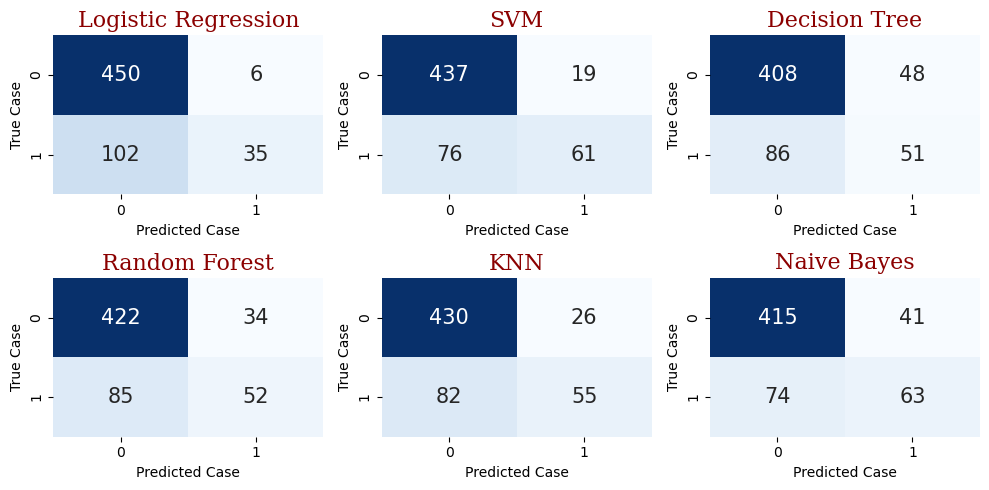

In [52]:
#figure size
plt.figure(figsize=(10,5))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Looping membuat heatmap matrix
for i, (model_name, matrix) in enumerate(classification_matrices.items()):
    plt.subplot(2, 3, i+1)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d',cbar = False,annot_kws = {'fontsize': 15})
    plt.title(model_name, fontdict=font)
    plt.xlabel('Predicted Case')
    plt.ylabel('True Case')



# Show plot
plt.tight_layout()
plt.show()

Terlihat pada confusion matrixsekilas kalau semua model memiliki tingkat akurasi dan prediksi yang tidak terlalu signifikan perbedaannya terkecuali model decission tree dan naive bayes

## Cross Validation

In [53]:
# import cross validation
from sklearn.model_selection import cross_val_score

In [54]:
#fitur yang diguanakn
X_train_scaled_new.head(2)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
96,0.2,0.222222,0.222222,0.2,0.222222,0.222222,0.051948
1610,0.4,0.222222,0.222222,0.2,0.222222,0.222222,0.090909


In [55]:
# model yang digunakan
models_list = [lr,dt,svc,rf,knn,gnb] 

# Print the mean and standard deviation of the model scores

for i in models_list:

    cross_score = cross_val_score(i, X_train_scaled_new, y_train, cv=5)

    print(i,'   Accuracy for each fold  =    ', cross_score)
    print(i,'   CV Scores: Mean         =    ', cross_score.mean())
    print(i,'   CV Scores: Std          =    ', cross_score.std())
    print('')


LogisticRegression()    Accuracy for each fold  =     [0.82105263 0.82736842 0.8164557  0.8164557  0.79746835]
LogisticRegression()    CV Scores: Mean         =     0.8157601598934043
LogisticRegression()    CV Scores: Std          =     0.009983182581670651

DecisionTreeClassifier()    Accuracy for each fold  =     [0.77894737 0.8        0.7742616  0.79746835 0.78691983]
DecisionTreeClassifier()    CV Scores: Mean         =     0.7875194314901177
DecisionTreeClassifier()    CV Scores: Std          =     0.010043460061719406

SVC()    Accuracy for each fold  =     [0.82947368 0.85684211 0.84388186 0.83122363 0.82911392]
SVC()    CV Scores: Mean         =     0.8381070397512769
SVC()    CV Scores: Std          =     0.010836452319723005

RandomForestClassifier()    Accuracy for each fold  =     [0.80842105 0.82105263 0.78691983 0.81012658 0.80168776]
RandomForestClassifier()    CV Scores: Mean         =     0.8056415722851433
RandomForestClassifier()    CV Scores: Std          =     0.0

SVC memiliki akurasi yang paling besat menurut Cross-Validation dan juga relative std yang rendah

## Hyperparameter Tuning

In [56]:
# Using Grid Search
from sklearn.model_selection import GridSearchCV

In [57]:
# Define the parameter grid for the SVM
param_grid = {
            'C': [0.1, 1, 2 ,5 ,10], 
            'kernel': ['linear', 'rbf', 'sigmoid'],
            'gamma': ['scale','auto']
            }

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled_new, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.8381070397512769


Setelah parameter tuning didapatkan hyperparameter untuk svc adalah :

C : 2

Kernel : rbf

Gamma : 'Scale'


Dengan nilai akurasi terbaik ``0.838``



In [58]:
# memperbarui model

# Create an instance of the SVM class
svc_tuned = SVC(C = 2, kernel= 'rbf', gamma= 'scale')

# model training and fitting
svc_tuned.fit(X_train_scaled_new, y_train)

SVC(C=2)

In [59]:
y_pred_new = svc_tuned.predict(X_test_scaled_new)

print(svc_tuned)
print(classification_report(y_test, y_pred_new), end='') 
print('')

SVC(C=2)
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       456
           1       0.77      0.45      0.57       137

    accuracy                           0.84       593
   macro avg       0.81      0.71      0.74       593
weighted avg       0.83      0.84      0.83       593



## Model Inference

In [60]:
# kolom ynag dipakai
num_columns_final = X_train_scaled_new.columns.tolist()
cat_columns_final = X_train.loc[:,['sex','marital_status']].columns.tolist()

In [61]:
num_columns_final

['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance']

In [62]:
# Save the Files

import pickle
import json

with open('model.pkl', 'wb') as file_1:
  pickle.dump(svc_tuned, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler_1, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(ohe, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns_final, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns_final, file_5)

ModuleNotFoundError: No module named 'pickled'

## Conceptual Problems


1. Apa yang dimaksud dengan `criterion` pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
2. Jelaskan apa yang dimaksud dengan `pruning` pada Tree-based model (alasan, definisi, jenis, dll) !
3. Bagaimana cara memilih `K` yang optimal pada KNN ?
4. Jelaskan apa yang dimaksud dengan `Cross Validation` !
5. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya ?


Jawaban :


1. Criterion adalah metrics yang digunakan untuk menentukan kualitas dari sebuah split dalam Decision Tree. Ada beberapa jenis criterion yang dapat digunakan, seperti Gini Index, Information Gain, dan Gain Ratio. 

Dalam kasus ini, criterion di set dalam mode default yaitu gini : Gini adalah konstanta/nilai/skor seberapa "kotor" atau "bersih" suatu kumpulan data. Ini digunakan dalam algoritma decission tree untuk menentukan saat terbaik untuk pembagian data menjadi kelompok yang berbeda. Skor gini berada di range 0 - 1 yang mana semakin mendekati 0, maka kelompok data semakin homogen dan 'bersih' dan semakin mendekati 1 maka dalam data semakin banyak terdapat campuran kelompok. 

2. Pruning adalah teknik dari tree-based model untuk mengurangi kompleksitas dari model dengan cara memotong atau menghapos bagian bagian dari npohon yang dianggap tidak relevan, karena Tree-based algorithm adalah model maschine learning yang paling rentan terhadap overfitting dan pruning dapat mengurngi resiko tersebut.

Tipe-tipe pruning adalah : 

- Pre-pruning : adalah teknik yang digunakan dalam model Tree-based untuk mencegah overfitting dengan cara mengontrol pertumbuhan pohon sebelum menjadi terlalu kompleks. Contohnya memberikan limit pada depth (max_depth) hanya menjadi 4 level (default yang juga dipakai pada model). Contoh lain menentukan minimum jumlah sample minimum pada leaf node (min_samples_leaf) yang mana data tidak akan di split jika jumlah sample pada hasil split di leaf tidak memenumi jumlah minimum.

- Post -pruning : Sederhananya, post-pruning adalah teknik yang digunakan untuk menurunkan tingkat kerumitan Tree-based model dan mencegah overfitting. Ini akan membuat pohon lebih sederhana dan dapat lebih mudah ditafsirkan. Tekniknya adalah dengan menghapus cabang yang tidak berkontribusi signifikan pada performa model.

3. Dengan metode cross validation dapat menjadi salah satu cara manual untuk memilih nilai K yaitu dengan mencoba satu persatu nilai k dimasukkan ke syntax cross validation. 

4. Cross validation adala salah satu teknik untuk mengevaluasi konsistensi performa suatu model. Cara kerja cross validaion adalah data yang ada, dibagi menjadi n-fold atau disusun dengan susunan acak sebanyak n kali. Lalu data yang telah di susun kembali itu dilakukan training dan testing sesuai proposinya masing2. Lalu performa data yang telah di test dibandingkan dengan yang lainnya. Tentu tujuan utama cross validation adalah untuk melihat performa data jilakau nanti ada data yang baru (unseen data).

5.  - Accuracy : Secara teknis accuracy adalah jumlah prediksi yang benar dibandingkan dengan seluruh prediksi data atau persentase dari prediksi yang benar dalam sebuah model.

    - Recall : Adalah perbandingan antara prediksi positif dari case positif dan seluruh case positif. Atau dalam bahasa lain recall adalah dari seluruh case, berapa persen model dapat memprediksi dengan case dengan benar.

    - Precission : Adalah perbandingan antara prediksi positif dari case positif dari seluruh prediksi positif. Atau ketika model memprediksi sesuatu, seberapa benar prediksi itu?

    - F1 Score : F1 Score merupakan perbandingan rata-rata presisi dan recall 

    Waktu yang tepat menggunakannya adalah tergantung pada kebijakan perusahaan atau keperluan, khususnya untuk recall dan precission. Sedangkan jika tidak ada kebijakan khusus atau aturan khusus, maka accuracy dan f1 score bisa menjadi pilihan untuk mengevaluasi


## Pengambilan Kesimpulan

Kesimpulan yang dapat diambil dari Project Ini adalah:


Pada EDA : Pada data, terdapat lebih banyak probabilitas user atau client yang cenderung tidak default,

lalu untuk sex, lebih didominasi sex 2 dan begitupula marital status 2:

Pada semua kolom atau fitur yang tersedia pada dataset, dan telah dilakukan plot korelasi dengan menggunakan metode pearson, hanya kolom pay_0 sampai dengan kolom pay_6 ditambah kolom limit_balance lah yang memiliki korelasi yang cukup besar untuk memnentukan apakah client akan default pada bulan depan atau tidak. (kolom pay_ merupakan kolom penanda kemampuan membayar suatu individu)

Dari semua model yang dibuat, model SVC merupakan model yang cenderung paling tinggi tingkat akurasinya, begitupula tingkat f1 scorenya. Ini dilihat dari metode evaluasi mennguakan classification report dan cross validation.
Dengan nilai akurasi ``0.838``

Lalu setelah dipilih dilakukanlah hyperparameter tuning dengan menggunakan GRid Search dan mendapatkan beberapa hyperparameter terbaik dari SVC yaitu:

``C : 2``

``Kernel : rbf``

``Gamma : 'Scale'``


Dengan nilai akurasi terbaik ``0.838``

Nilai Cenderung sama sebelum dan setelah di tuning